In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from numpy.polynomial.polynomial import polyfit
import numpy as np
import thinkstats2
#import os
#os.chdir('/home/steven/Dropbox/DSC/530/Final Project/')

In [2]:
splash = pd.read_csv('splash_mountain.csv')
metadata = pd.read_csv('metadata.csv', index_col=0)
splash.rename(columns={'date':'DATE'}, inplace=True)

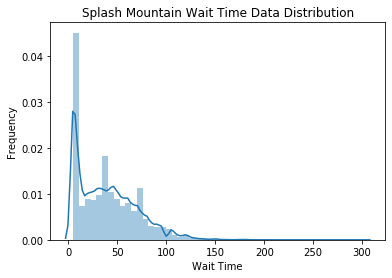

In [3]:
splash_without_downtimes = splash[splash.SPOSTMIN >= 5]

sns.distplot(splash_without_downtimes.SPOSTMIN, axlabel="Wait Time")
plt.title('Splash Mountain Wait Time Data Distribution')
plt.ylabel("Frequency")
plt.savefig("SPOSTMIN.png")

In [4]:
joined_data = splash_without_downtimes.join(metadata, on='DATE', how='right')

How does temperature affect wait times for Splash Mountain? 

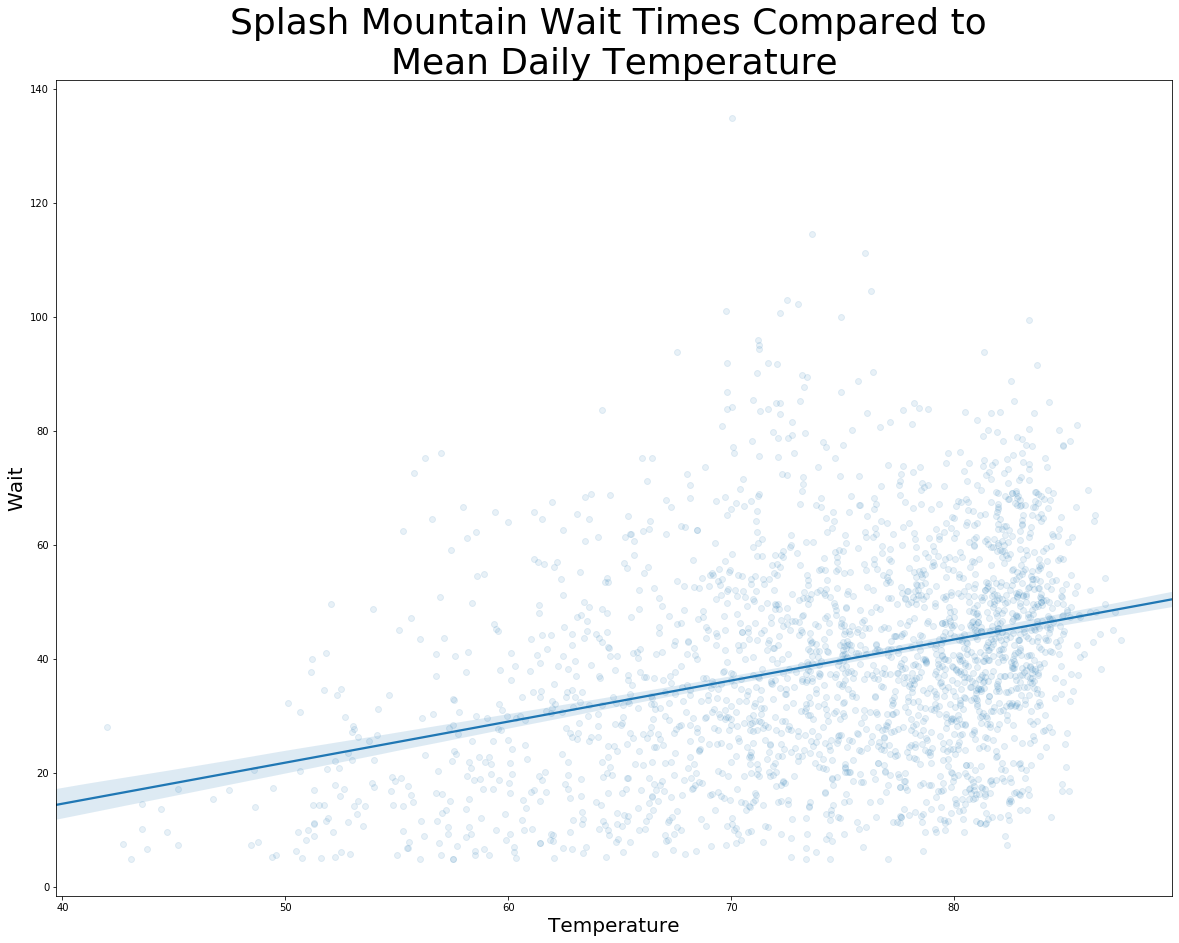

In [5]:
plt.figure(figsize=(20,15))
daily_mean_wait = splash_without_downtimes.groupby('DATE')['SPOSTMIN'].agg(np.mean)
daily_temperature = metadata.WDWMEANTEMP
scatter_df = pd.DataFrame(index=daily_mean_wait.index, columns=['Wait','Temp'])
scatter_df.Wait = daily_mean_wait
scatter_df.Temp = daily_temperature
sns.regplot(x=scatter_df['Temp'], y=scatter_df['Wait'], scatter_kws={'alpha':0.1})
plt.title("Splash Mountain Wait Times Compared to \nMean Daily Temperature", fontsize=36)
plt.xlabel('Temperature',fontsize=20)
plt.ylabel('Wait',fontsize=20)
plt.savefig('waitvtemp.png')

In [6]:
from scipy.stats import spearmanr
scatter_df.dropna(inplace=True)
spearmanr(scatter_df.Temp, scatter_df.Wait)

SpearmanrResult(correlation=0.31991161167813614, pvalue=1.1827405935373942e-57)

 How does precipitation affect wait times?

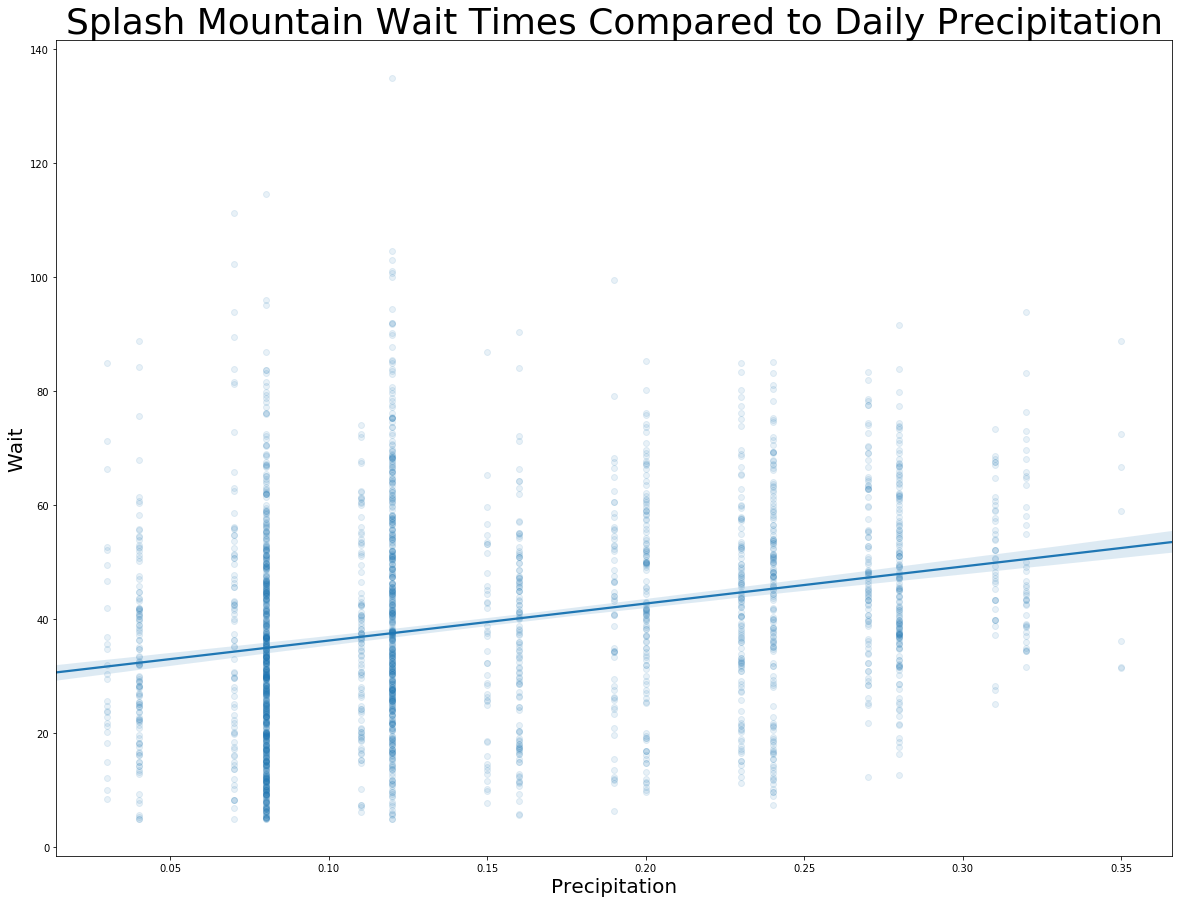

In [7]:
plt.figure(figsize=(20,15))
daily_mean_wait = splash_without_downtimes.groupby('DATE')['SPOSTMIN'].agg(np.mean)
daily_rainfall = metadata.WEATHER_WDWPRECIP
scatter_df = pd.DataFrame(index=daily_mean_wait.index, columns=['Wait','Rain'])
scatter_df.Wait = daily_mean_wait
scatter_df.Rain = daily_rainfall
sns.regplot(x=scatter_df['Rain'], y=scatter_df['Wait'], scatter_kws={'alpha':0.1})
plt.title("Splash Mountain Wait Times Compared to Daily Precipitation", fontsize=36)
plt.xlabel('Precipitation',fontsize=20)
plt.ylabel('Wait',fontsize=20)
plt.savefig('waitvrain.png')

In [8]:
from scipy.stats import spearmanr
spearmanr(scatter_df.Rain, scatter_df.Wait)

SpearmanrResult(correlation=0.2952481198867652, pvalue=4.212988470408548e-49)

How do holidays impact wait times?

Text(0.5, 1.0, 'Wait Times Based on Level of Holiday')

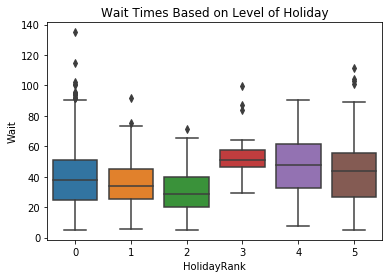

In [9]:
daily_holiday_rank = metadata.HOLIDAYM
boxplot_df = pd.DataFrame(index=daily_mean_wait.index, columns = ['Wait','HolidayRank'])
boxplot_df.Wait = daily_mean_wait
boxplot_df['HolidayRank'] = daily_holiday_rank
sns.boxplot(x='HolidayRank',y='Wait',data=boxplot_df)
plt.title("Wait Times Based on Level of Holiday")

What time of day appears to have the longest waits?

C:\ProgramData\Anaconda2\envs\pyfinance\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Average Wait Time Grouped by Hour of Day')

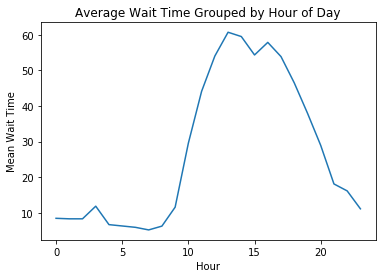

In [10]:
splash_without_downtimes['datetime'] = pd.to_datetime(splash_without_downtimes.datetime)
splash_by_hour = splash_without_downtimes.groupby(splash_without_downtimes.datetime.dt.hour)['SPOSTMIN'].agg(np.mean)
sns.lineplot(x = splash_by_hour.index, y = splash_by_hour)
plt.xlabel('Hour')
plt.ylabel('Mean Wait Time')
plt.title("Average Wait Time Grouped by Hour of Day")

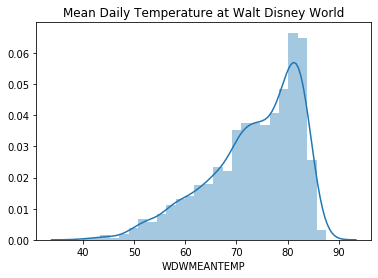

In [11]:
temps = metadata['WDWMEANTEMP'].dropna()
sns.distplot(temps)
plt.title("Mean Daily Temperature at Walt Disney World")
plt.savefig('temps.png')

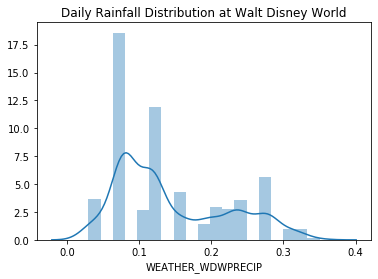

In [12]:
sns.distplot(daily_rainfall)
plt.title("Daily Rainfall Distribution at Walt Disney World")
plt.savefig('rain.png')

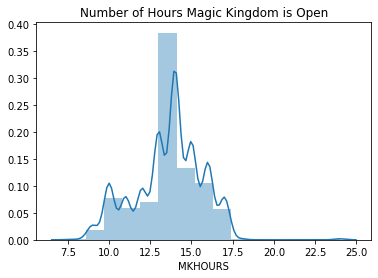

In [13]:
sns.distplot(metadata['MKHOURS'], bins=15)
plt.title("Number of Hours Magic Kingdom is Open")
plt.savefig('hrs.png')

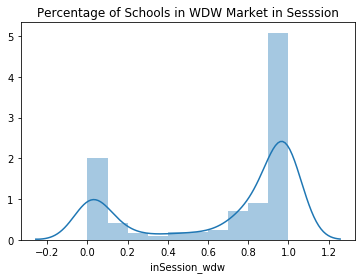

In [14]:
metadata['inSession_wdw'] = [float(i.strip('%'))/100 for i in metadata['inSession_wdw']]
sns.distplot(metadata['inSession_wdw'])
plt.title("Percentage of Schools in WDW Market in Sesssion")
plt.savefig('school.png')

In [15]:
from scipy.stats import skew, kurtosis

def summaryStats(ser):
    print(ser.name)
    print('min:',min(ser))
    print('max: ',max(ser))
    print('mean: ',np.mean(ser))
    print('median: ',np.median(ser))
    print('std dev: ', np.std(ser))
    print('skew: ', skew(ser))
    print('kurtosis: ', kurtosis(ser))
    print('')


summaryStats(splash_without_downtimes.SPOSTMIN)
summaryStats(metadata['MKHOURS'])
temp = metadata['WDWMEANTEMP'].dropna()
summaryStats(temp)
precip = metadata['WEATHER_WDWPRECIP'].dropna()
summaryStats(precip)
insession = metadata['inSession_wdw'].dropna()
summaryStats(insession)

SPOSTMIN
min: 5.0
max:  300.0
mean:  39.45460137098275
median:  35.0
std dev:  30.087843538751873
skew:  0.8287683530043536
kurtosis:  0.4763759367464897

MKHOURS
min: 7.5
max:  24.0
mean:  13.628047868362005
median:  14.0
std dev:  2.0472461419983397
skew:  -0.20389714520198793
kurtosis:  0.3871210383028654

WDWMEANTEMP
min: 39.75
max:  87.49
mean:  73.43999250374813
median:  75.16
std dev:  8.929668055932941
skew:  -0.8774005929999301
kurtosis:  0.1640201658274525

WEATHER_WDWPRECIP
min: 0.03
max:  0.35
mean:  0.143735976065819
median:  0.12
std dev:  0.07740841960177203
skew:  0.7187236466357255
kurtosis:  -0.6844391967946009

inSession_wdw
min: 0.0
max:  1.0
mean:  0.6783470456245325
median:  0.9
std dev:  0.3919184990860046
skew:  -0.8656786710003818
kurtosis:  -1.0177583895803055



## Wait time Distributions Based on Holiday Seasons

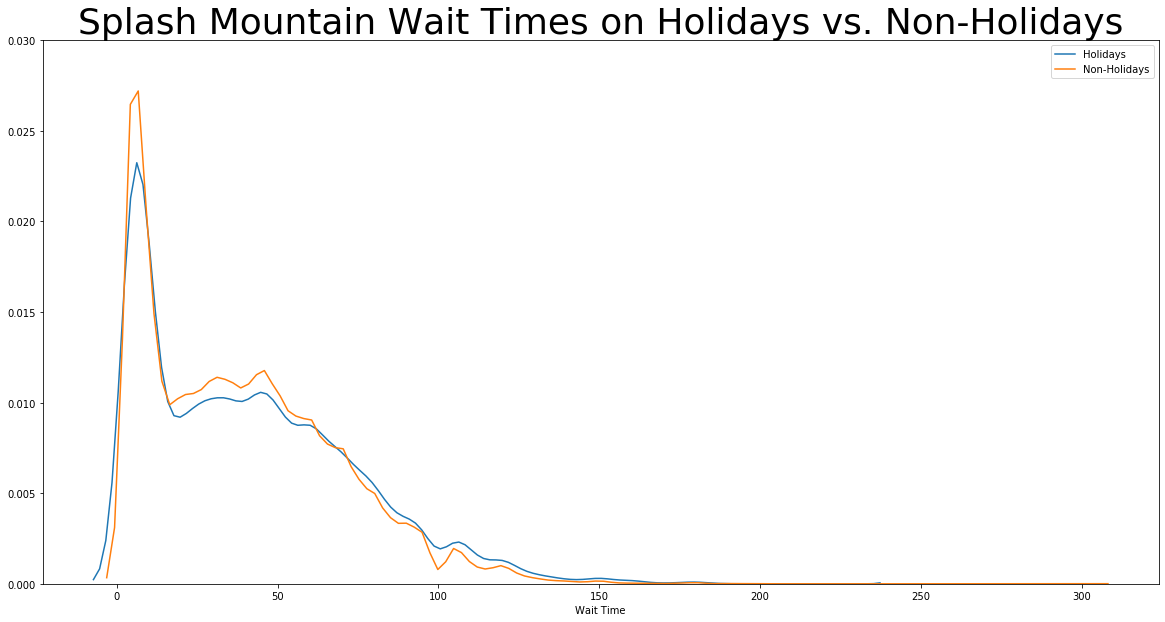

In [16]:
plt.figure(figsize=(20,10))
holidays = joined_data[joined_data.HOLIDAYM > 0]['SPOSTMIN'].dropna()
non_holidays = joined_data[joined_data.HOLIDAYM == 0]['SPOSTMIN'].dropna()
sns.distplot(holidays, axlabel="Wait Time", hist=False, label="Holidays")
sns.distplot(non_holidays, axlabel="Wait Time", hist=False, label="Non-Holidays")
plt.title("Splash Mountain Wait Times on Holidays vs. Non-Holidays", fontsize=36)
plt.ylim(0,0.03)
plt.savefig('holvsnon.png')

## CDF

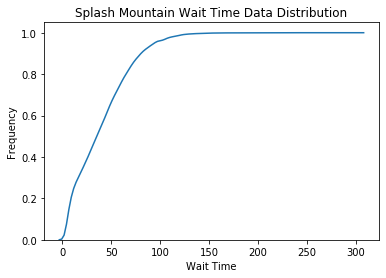

In [17]:
sns.distplot(splash_without_downtimes.SPOSTMIN, axlabel="Wait Time", hist=False, kde_kws=dict(cumulative=True))
plt.title('Splash Mountain Wait Time Data Distribution')
plt.ylabel("Frequency")
plt.savefig("SPOSTMINDCF.png")

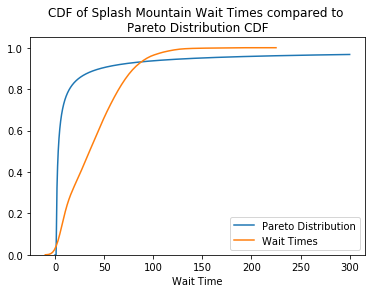

In [18]:
from scipy.stats import pareto
fig, ax = plt.subplots(1, 1)
a = .6# shape parameters
x = splash_without_downtimes.SPOSTMIN.sample(n=10000).sort_values()
output = pareto.cdf(np.linspace(0,300,10000),a)
plt.plot(np.linspace(0,300,10000), output.T, label='Pareto Distribution')
sns.distplot(x, axlabel="Wait Time", hist=False, kde_kws=dict(cumulative=True), label='Wait Times')
plt.title('CDF of Splash Mountain Wait Times compared to \nPareto Distribution CDF')
ax.legend()
plt.savefig('pareto.png')

Hypothesis Testing

In [19]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [20]:
daily_mean_wait = splash_without_downtimes.groupby('DATE')['SPOSTMIN'].agg(np.mean)
daily_temperature = metadata.WDWMEANTEMP

cor_df = pd.DataFrame(index=daily_mean_wait.index, columns=['Wait','Temp'])
cor_df.Wait = daily_mean_wait
cor_df.Temp = daily_temperature
cor_df.dropna(inplace=True)
data = cor_df.Wait, cor_df.Temp
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

print(f"p-value:\t\t\t{pvalue}\nActual Correlation:\t\t{ht.actual}\nMax Correlation Seen in Test:\t{ht.MaxTestStat()}")

p-value:			0.0
Actual Correlation:		0.3206742944315162
Max Correlation Seen in Test:	0.07398821667021865


In [21]:
daily_mean_wait = splash_without_downtimes.groupby('DATE')['SPOSTMIN'].agg(np.mean)
daily_rainfall = metadata.WEATHER_WDWPRECIP

cor_df = pd.DataFrame(index=daily_mean_wait.index, columns=['Wait','Rain'])
cor_df.Wait = daily_mean_wait
cor_df.Rain = daily_rainfall
cor_df.dropna(inplace=True)
data = cor_df.Wait, cor_df.Rain
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

print(f"p-value:\t\t\t{pvalue}\nActual Correlation:\t\t{ht.actual}\nMax Correlation Seen in Test:\t{ht.MaxTestStat()}")

p-value:			0.0
Actual Correlation:		0.2711089460052072
Max Correlation Seen in Test:	0.06409339970064805


## Regression Model, Mean Wait Times as a function of temperature and precipitation

In [22]:
from sklearn.linear_model import LinearRegression
reg_df = pd.DataFrame(index=daily_mean_wait.index, columns=['Wait','Temp','Rain'])
reg_df.Wait = daily_mean_wait
reg_df.Rain = daily_rainfall
reg_df.Temp = daily_temperature
reg_df.dropna(inplace=True)
x = reg_df[['Rain','Temp']]
x = np.array(x)
y = np.array(reg_df.Wait)
model = LinearRegression().fit(x,y)
model.score(x,y)

0.11225299177380499

In [23]:
import statsmodels.api as sm

reg_df = pd.DataFrame(index=daily_mean_wait.index, columns=['Wait','Temp','Rain','in_session','holiday_rank','park_hours'])
reg_df.Wait = daily_mean_wait
reg_df.Rain = daily_rainfall
reg_df.Temp = daily_temperature
reg_df.in_session = metadata.inSession_wdw
reg_df.holiday_rank = metadata.HOLIDAYM
reg_df.park_hours = metadata.MKHOURS
reg_df.dropna(inplace=True)
X = reg_df[['Rain','Temp','in_session','park_hours']]
y = reg_df.Wait
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

C:\ProgramData\Anaconda2\envs\pyfinance\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wait   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     258.6
Date:                Fri, 31 May 2019   Prob (F-statistic):          1.39e-184
Time:                        15:30:55   Log-Likelihood:                -9934.0
No. Observations:                2375   AIC:                         1.988e+04
Df Residuals:                    2370   BIC:                         1.991e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.0235      4.412     -9.526      0.000     -50.674     -33.373
Rain         -11.3347      5.976     -1.897      0.058     -23.054       0.384
Temp           0.6325      0.049     12.984      0.000       0.537       0.728
in_session   -10.2395      1.065     -9.617      0.000     -12.327      -8.152
park_hours     3.1204      0.177     17.636      0.000       2.773       3.467
==============================================================================
Omnibus:                      267.756   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              414.853
Skew:                           0.808   Prob(JB):                     8.24e-91
Kurtosis:                       4.258   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""